In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.DataFrame()

for i in range(6):
    a = np.load('./results/exp_{}_q_value_estimate_each_period.npy'.format(i+1))
    df[i] = a[:30000].tolist()

In [32]:
median = df.median(axis=1).tolist()
minimum = df.min(axis=1).tolist()
maximum = df.max(axis=1).tolist()

In [33]:
l = [minimum[i]*0.9 + maximum[i]*0.1 for i in range(len(minimum))]
h = [minimum[i]*0.1 + maximum[i]*0.9 for i in range(len(maximum))]

In [34]:
dqn = pd.DataFrame()
dqn['m'] = median
dqn['l'] = l
dqn['h'] = h

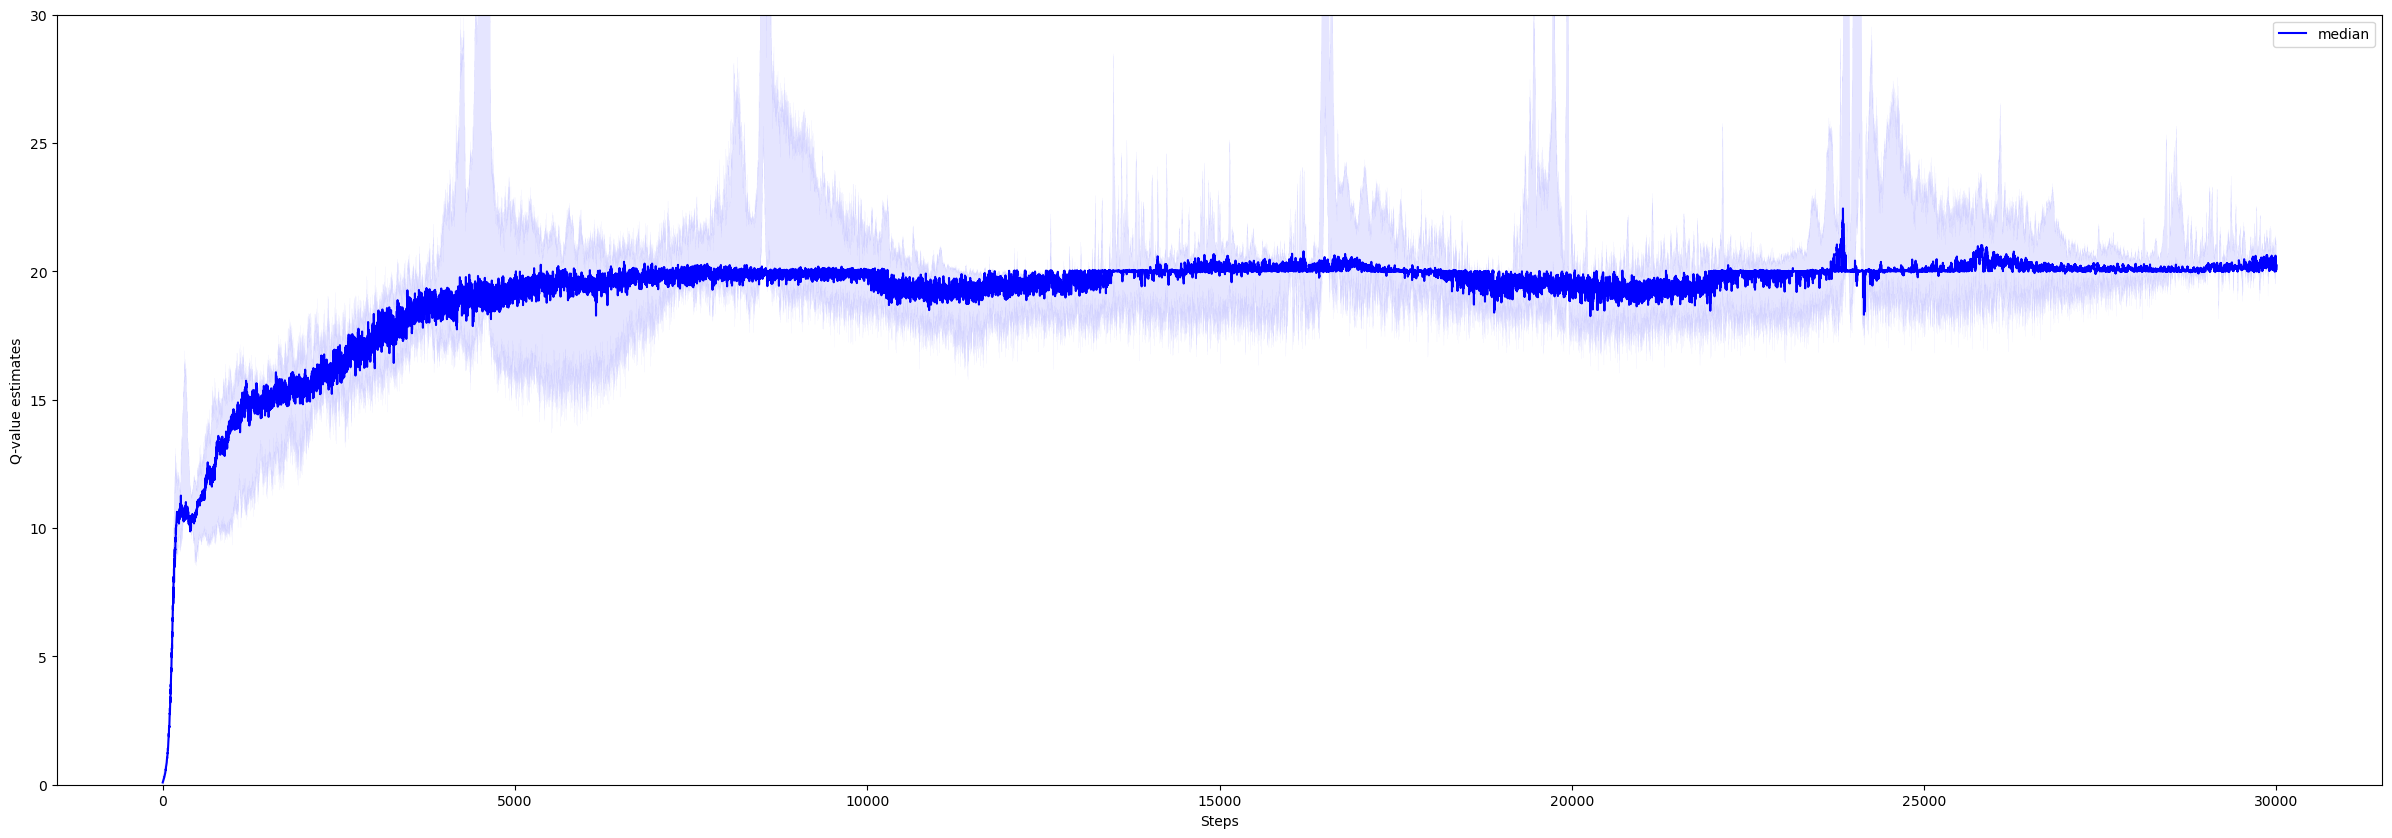

In [36]:
fig, ax = plt.subplots(figsize=(30, 10))

plt.ylim((0,30))
plt.fill_between(dqn.index, dqn['l'],dqn['h'], color='blue', alpha=0.1, linewidth=0.1)
plt.plot(dqn['m'], color='blue', label='median')
plt.legend()
plt.ylabel('Q-value estimates')
plt.xlabel('Steps')
plt.savefig('./results/Q_value_estimeats_6_seed_values.png')

plt.show()

In [37]:
df = pd.DataFrame()

for i in range(6):
    a = np.load('../DDQN/results/exp_{}_q_value_estimate_each_period.npy'.format(i+1))
    df[i] = a[:30000].tolist()

In [38]:
median = df.median(axis=1).tolist()
minimum = df.min(axis=1).tolist()
maximum = df.max(axis=1).tolist()
l = [minimum[i]*0.9 + maximum[i]*0.1 for i in range(len(minimum))]
h = [minimum[i]*0.1 + maximum[i]*0.9 for i in range(len(maximum))]

In [39]:
ddqn = pd.DataFrame()
ddqn['m'] = median
ddqn['l'] = l
ddqn['h'] = h

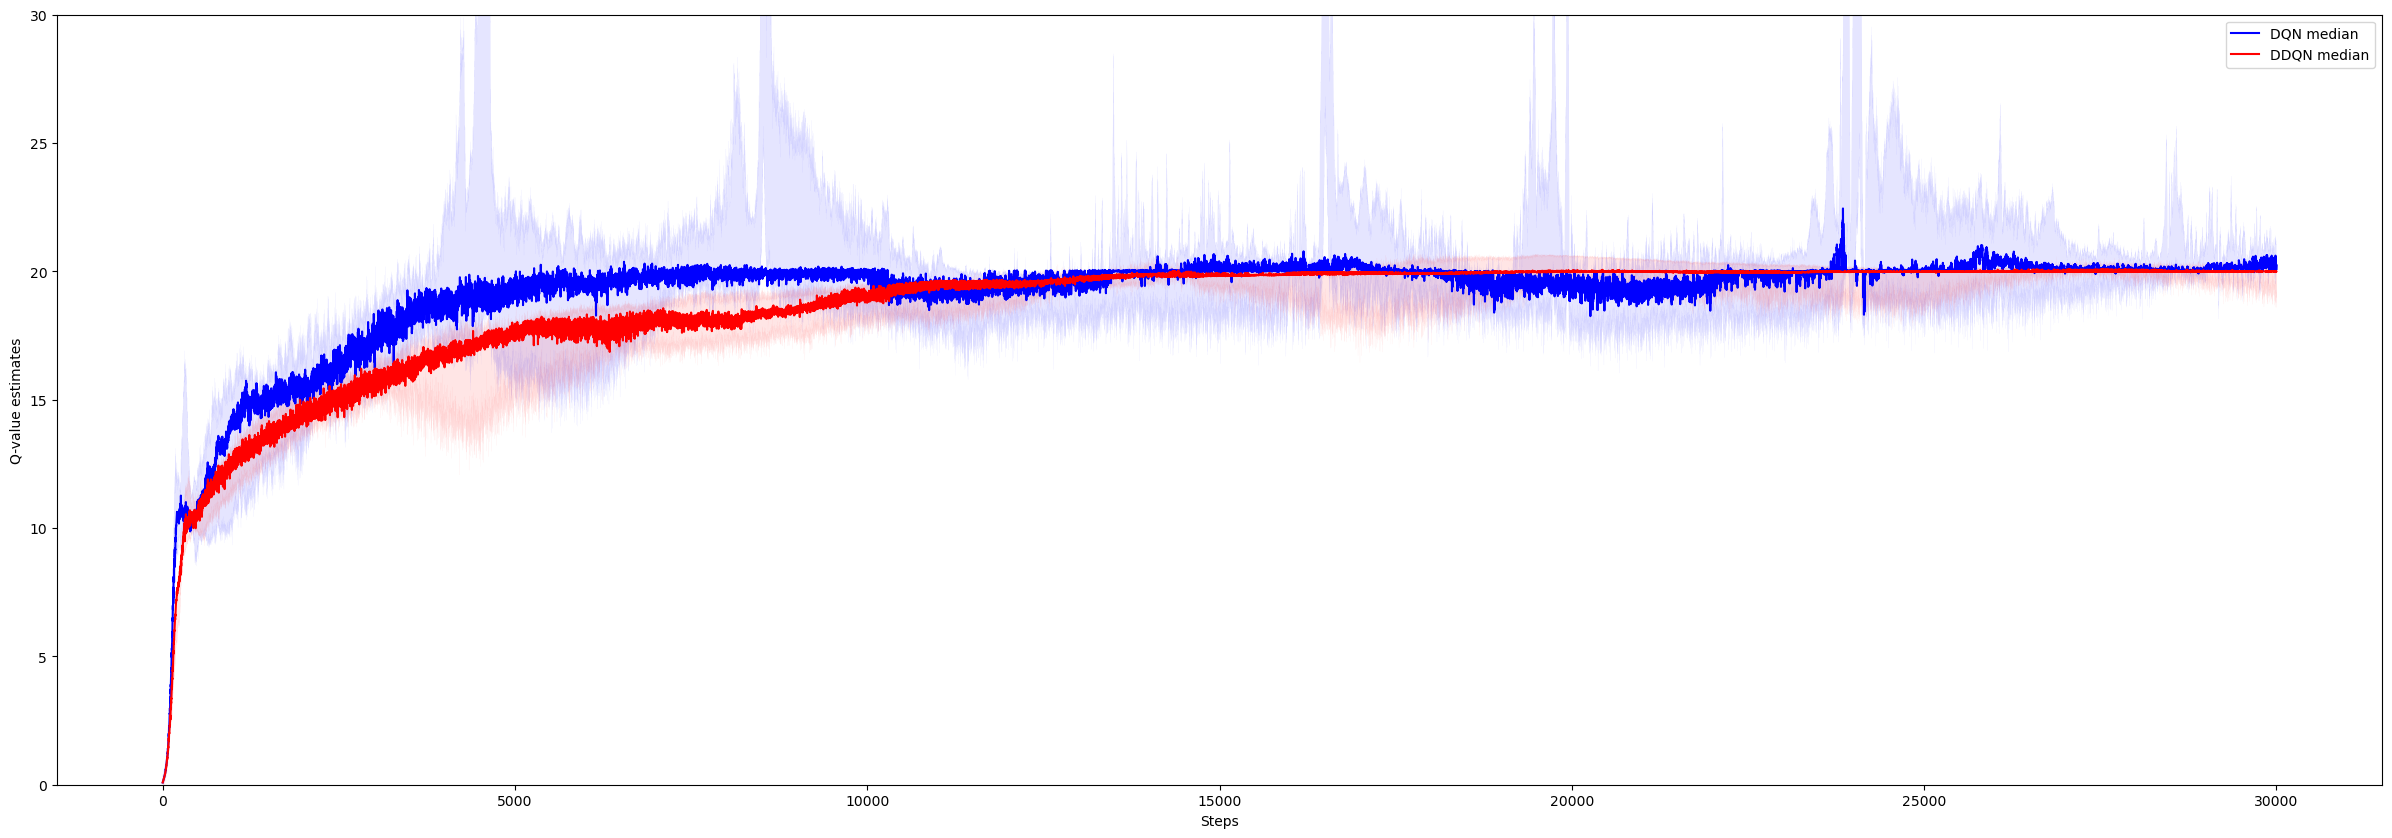

In [40]:
fig, ax = plt.subplots(figsize=(30, 10))

plt.ylim((0,30))
plt.fill_between(dqn.index, dqn['l'],dqn['h'], color='blue', alpha=0.1, linewidth=0.1)
plt.plot(dqn['m'], color='blue', label='DQN median')

plt.fill_between(ddqn.index, ddqn['l'],ddqn['h'], color='red', alpha=0.1, linewidth=0.1)
plt.plot(ddqn['m'], color='red', label='DDQN median')

plt.legend()
plt.ylabel('Q-value estimates')
plt.xlabel('Steps')

plt.show()